In [1]:
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

2024-05-30 20:32:27.666995: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 20:32:31.469353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 20:32:31.483342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 20:32:41.856797: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_dir = 'data'
classes = os.listdir(data_dir)
image_exts = ['jpeg', 'jpg', 'png' 'bmp']
BS = 8
IMG_SIZE = (256, 256, 3)
EPOCHS = 10

In [4]:
def load_and_preprocess_dataset(data_dir):
    data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=BS)
    data = data.map(lambda x, y: (x/255, y))
    data_iterator = data.as_numpy_iterator()
    batch = data_iterator.next()
    print('Dataset shape {}'.format(batch[0].shape))
    print('Dataset label shape {}\n'.format(batch[1].shape))
    
    return data

In [5]:
data = load_and_preprocess_dataset(data_dir)

Found 120 files belonging to 28 classes.
Dataset shape (8, 256, 256, 3)
Dataset label shape (8,)



In [6]:
#### SPLIT DATA
def split_data(data):
    train_size = int(len(data)*.7)
    val_size = int(len(data)*.2)
    test_size = int(len(data)*.1)+1
    
    train = data.take(train_size)
    val = data.skip(train_size).take(val_size)
    test = data.skip(train_size+val_size).take(test_size)

    return train, val, test

In [7]:
train, val, test = split_data(data)
print('Dataset length: {}'.format(len(data)))
print('Train size: {}'.format(len(train)))
print('Val size: {}'.format(len(val)))
print('Test size: {}\n'.format(len(test)))

Dataset length: 15
Train size: 10
Val size: 3
Test size: 2



In [9]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), 1, activation='relu', input_shape=IMG_SIZE))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, (3, 3), 1, activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, (3, 3), 1, activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(len(classes), activation='softmax'))

    return model

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [11]:
##### compile
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [12]:
hist = model.fit(train, epochs=EPOCHS, validation_data=val)

Epoch 1/10
10/10 [==============================] - 18s 1s/step - loss: 3.9588 - accuracy: 0.0500 - val_loss: 3.3489 - val_accuracy: 0.0417
Epoch 2/10
10/10 [==============================] - 15s 2s/step - loss: 3.1706 - accuracy: 0.1250 - val_loss: 3.0667 - val_accuracy: 0.1667
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 2.6105 - accuracy: 0.4250 - val_loss: 2.1745 - val_accuracy: 0.5417
Epoch 4/10
10/10 [==============================] - 23s 2s/step - loss: 1.6836 - accuracy: 0.6250 - val_loss: 1.0805 - val_accuracy: 0.8333
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.7354 - accuracy: 0.8500 - val_loss: 0.2654 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 21s 2s/step - loss: 0.3657 - accuracy: 0.9000 - val_loss: 0.6375 - val_accuracy: 0.8333
Epoch 7/10
10/10 [==============================] - 20s 2s/step - loss: 0.2960 - accuracy: 0.9375 - val_loss: 0.1507 - val_accuracy: 0.9583
Epoch 8/10
10/10 [==

In [13]:
def plot_perfomance(hist, first, second, legend_loc):
    fig = plt.figure()
    plt.plot(hist.history[first], label=first)
    plt.plot(hist.history[second], label=second)
    fig.suptitle(first.capitalize(), fontsize=24)
    plt.legend(loc=legend_loc)
    plt.show()

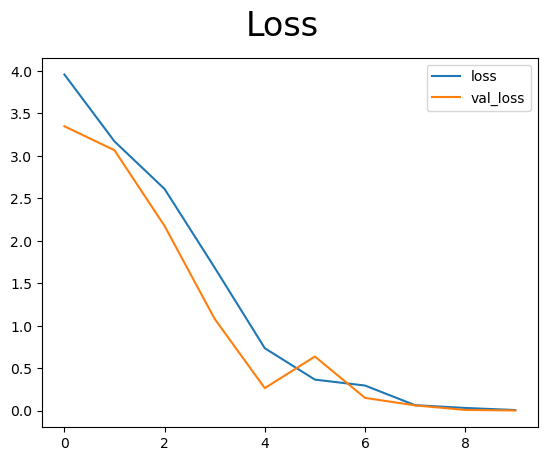

In [14]:
### Plot performance
#### loss
plot_perfomance(hist, 'loss', 'val_loss', 'upper right')

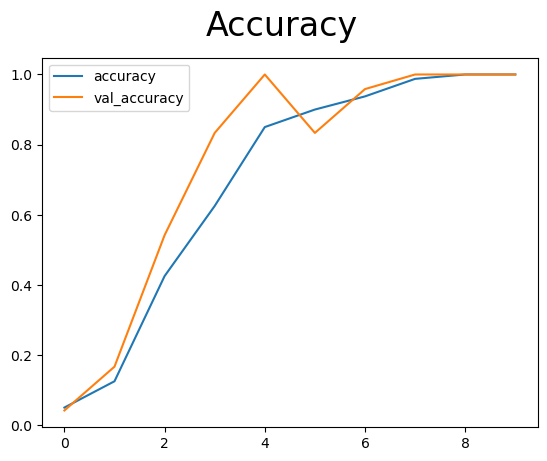

In [15]:
#### accuracy
plot_perfomance(hist, 'accuracy', 'val_accuracy', 'upper left')